## Data Processing

In [5]:
# !pip install pandas

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('titanic-dataset.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.shape

(891, 12)

In [11]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
df.duplicated().sum()
# No duplicate rows found

np.int64(0)

In [16]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [17]:
df[cat_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [19]:
df.isnull().sum() / df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [20]:
df_processed = df.drop(columns=['Name', 'Ticket', 'PassengerId'])
df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [22]:
df_processed.dropna(subset=['Embarked'], inplace=True)
df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [23]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [24]:
df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


/var/folders/ym/_s3k97_d73b65t9bntv696pw0000gn/T/ipykernel_3911/2647883964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True)


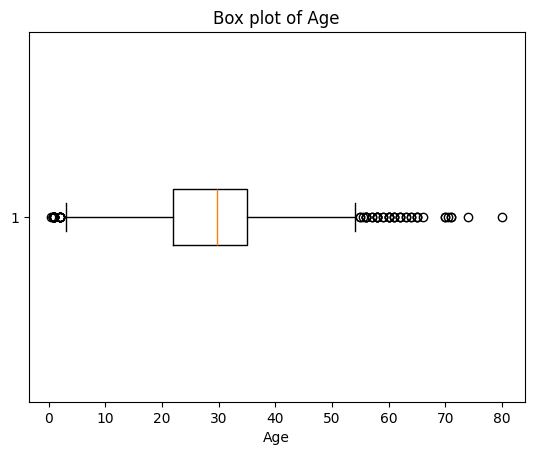

In [25]:
# Detect Outliers

import matplotlib.pyplot as plt

plt.boxplot(df_processed['Age'], vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

In [35]:
mean_age = df_processed['Age'].mean()
std_age = df_processed['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

outliers = df_processed[(df_processed['Age'] < lower_bound) | (df_processed['Age'] > upper_bound)]

In [36]:
outliers.shape

(68, 9)

In [37]:
df_processed = df_processed[(df_processed['Age'] >= lower_bound) & (df_processed['Age'] <= upper_bound)]

In [39]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  821 non-null    int64  
 1   Pclass    821 non-null    int64  
 2   Sex       821 non-null    object 
 3   Age       821 non-null    float64
 4   SibSp     821 non-null    int64  
 5   Parch     821 non-null    int64  
 6   Fare      821 non-null    float64
 7   Cabin     175 non-null    object 
 8   Embarked  821 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 64.1+ KB


In [41]:
df_processed.fillna(df_processed['Age'].mean()).info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  821 non-null    int64  
 1   Pclass    821 non-null    int64  
 2   Sex       821 non-null    object 
 3   Age       821 non-null    float64
 4   SibSp     821 non-null    int64  
 5   Parch     821 non-null    int64  
 6   Fare      821 non-null    float64
 7   Cabin     821 non-null    object 
 8   Embarked  821 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 64.1+ KB


In [42]:
mean_age = df_processed['Age'].mean()
std_age = df_processed['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 8.978989004171453, Upper Bound: 49.30395961288914


In [43]:
df_processed = df_processed[(df_processed['Age'] >= lower_bound) & (df_processed['Age'] <= upper_bound)]
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  762 non-null    int64  
 1   Pclass    762 non-null    int64  
 2   Sex       762 non-null    object 
 3   Age       762 non-null    float64
 4   SibSp     762 non-null    int64  
 5   Parch     762 non-null    int64  
 6   Fare      762 non-null    float64
 7   Cabin     156 non-null    object 
 8   Embarked  762 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 59.5+ KB


In [46]:
X = df_processed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df_processed['Survived']

In [47]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
# !pip install scikit-learn

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = [col for col in X.columns if X[col].dtype != 'object']
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

/var/folders/ym/_s3k97_d73b65t9bntv696pw0000gn/T/ipykernel_3911/2776591866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.325,0.125,0.0,0.014151,S
1,0.0,female,0.725,0.125,0.0,0.139136,C
2,1.0,female,0.425,0.000,0.0,0.015469,S
3,0.0,female,0.650,0.125,0.0,0.103644,S
4,1.0,male,0.650,0.000,0.0,0.015713,S


In [52]:
X.to_csv('X_processed.csv', index=False)
y.to_csv('y_processed.csv', index=False)

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']

# Class-Assignment

1. Use the given diabetics dataset and do the following
2. Do data cleaning, visualize, and remove outliers
3. Create a correlation matrix (use seaborn heatmap), create pie diagrams for output variable
4. Do feature scaling and save the processed data as csv files

In [54]:
diabetics_df = pd.read_csv('diabetes.csv')
diabetics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
diabetics_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


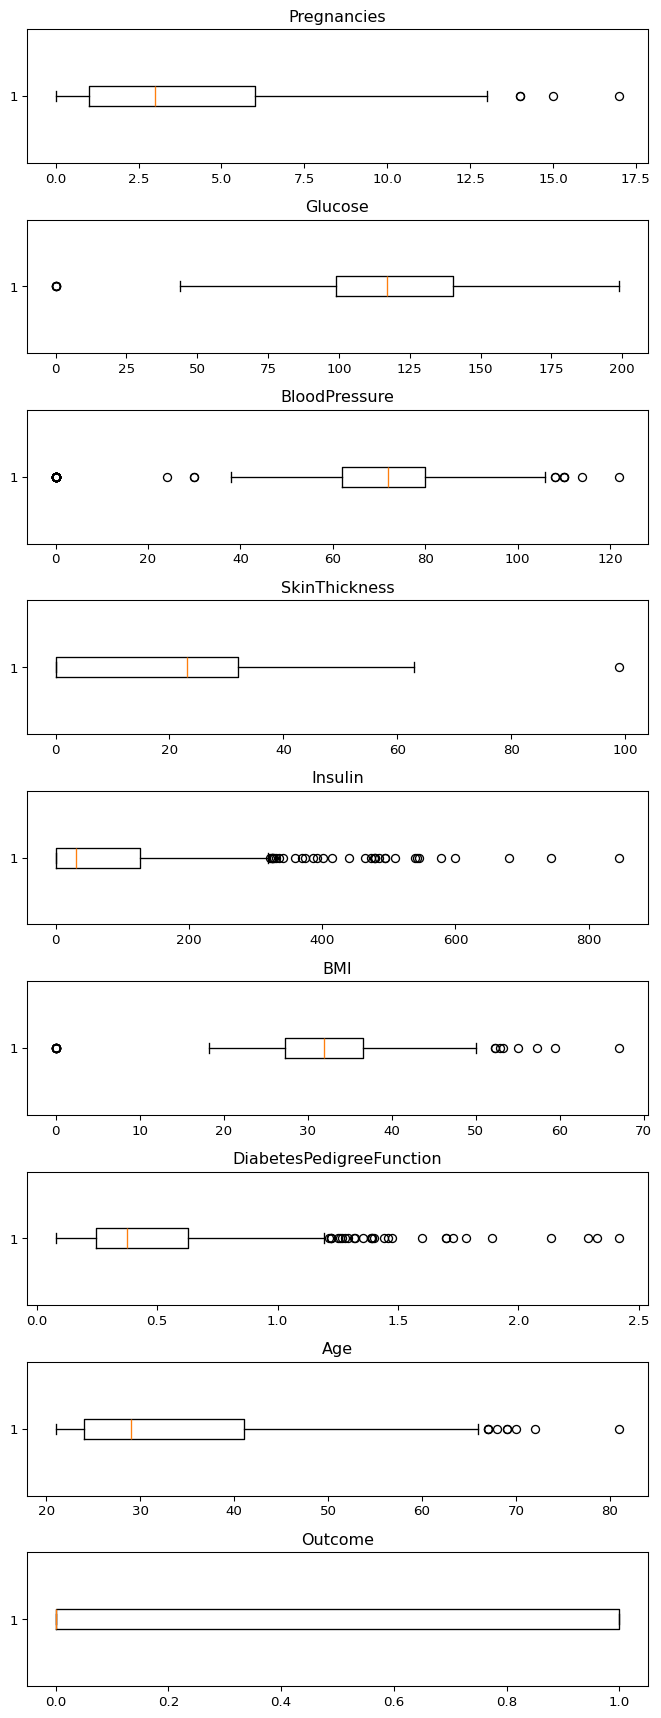

In [56]:
fig, ax = plt.subplots(len(diabetics_df.columns), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(diabetics_df.columns):
    ax[i].boxplot(diabetics_df[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

In [58]:
# remove outliers using IQR method
# IQR = Q3 - Q1
# Lower Bound = Q1 - 1.5 * IQR
# Upper Bound = Q3 + 1.5 * IQR
import numpy as np
q1, q3 = np.percentile(diabetics_df['Insulin'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
cleaned_df = diabetics_df[(diabetics_df['Insulin'] >= lower_bound) & (diabetics_df['Insulin'] <= upper_bound)]
cleaned_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.841962,119.182561,68.990463,19.985014,62.328338,31.854087,0.466918,33.185286,0.339237
std,3.383143,31.266437,19.613487,15.951788,79.132557,7.919395,0.322066,11.714824,0.473773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,36.400000,0.613750,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
diabetics_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
# !pip install seaborn

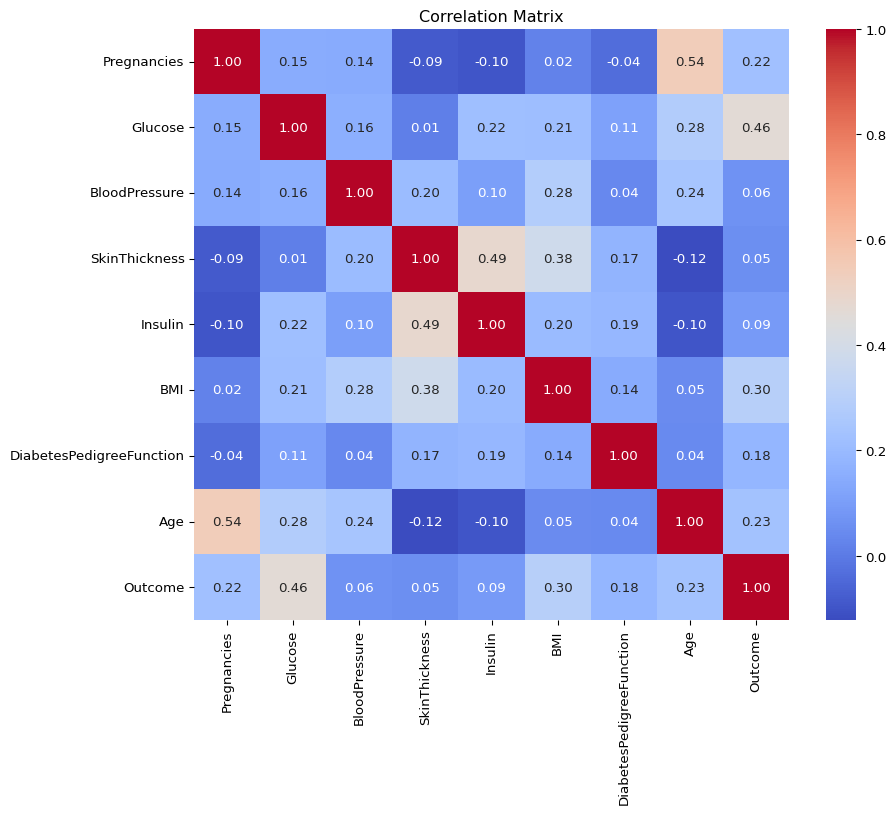

In [62]:
corr = cleaned_df.corr()
import seaborn as sns

plt.figure(figsize=(10, 8), dpi=96)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [63]:
print(corr['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.464128
BMI                         0.297225
Age                         0.231023
Pregnancies                 0.223300
DiabetesPedigreeFunction    0.183005
Insulin                     0.088944
BloodPressure               0.064360
SkinThickness               0.054106
Name: Outcome, dtype: float64


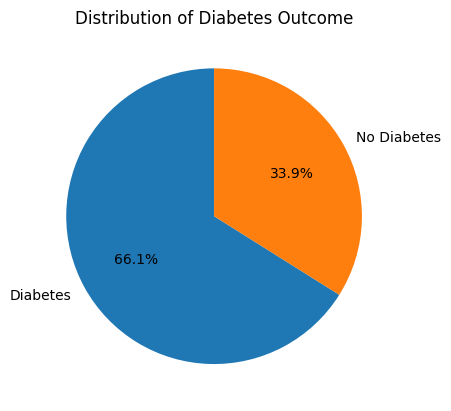

In [65]:
plt.pie(cleaned_df['Outcome'].value_counts(), labels=['Diabetes', 'No Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [66]:
X = cleaned_df.drop(columns=['Outcome'])
y = cleaned_df['Outcome']

In [70]:
scaler = MinMaxScaler()
X_normalized = X.copy()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]], shape=(734, 8))

In [ ]:
# https://www.kaggle.com/datasets/minahilfatima12328/lifestyle-and-sleep-patterns
# - One Hot Encoding
# - Standardization

In [ ]:
# #!/bin/bash
# !curl -L -o lifestyle-and-sleep-patterns.zip https://www.kaggle.com/api/v1/datasets/download/minahilfatima12328/lifestyle-and-sleep-patterns

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2604  100  2604    0     0   3173      0 --:--:-- --:--:-- --:--:--  3173


In [ ]:
# !unzip lifestyle-and-sleep-patterns.zip -d lifestyle-and-sleep-patterns

Archive:  lifestyle-and-sleep-patterns.zip
  inflating: lifestyle-and-sleep-patterns/Sleep_health_and_lifestyle_dataset.csv  


In [19]:
import pandas as pd
import os

ds_file = "sleep_heath_lifecycle_dataset.csv"

df = pd.read_csv(ds_file)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [20]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [22]:
df = df.drop(columns=['Person ID'])

In [23]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [24]:
# make all the headings lowercase and replace spaces with underscores
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [25]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

In [26]:
categorical_cols

['gender', 'occupation', 'bmi_category', 'blood_pressure', 'sleep_disorder']

In [27]:
# blood pressure is written as systolic/diastolic
# we will split it into two columns
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True)
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [28]:
# drop the original blood_pressure column
df = df.drop(columns=['blood_pressure'])

In [29]:
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   374 non-null    object 
 1   age                      374 non-null    int64  
 2   occupation               374 non-null    object 
 3   sleep_duration           374 non-null    float64
 4   quality_of_sleep         374 non-null    int64  
 5   physical_activity_level  374 non-null    int64  
 6   stress_level             374 non-null    int64  
 7   bmi_category             374 non-null    object 
 8   heart_rate               374 non-null    int64  
 9   daily_steps              374 non-null    int64  
 10  sleep_disorder           155 non-null    object 
 11  systolic_bp              374 non-null    object 
 12  diastolic_bp             374 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 38.1+ KB


In [31]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

In [32]:
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['gender', 'occupation', 'bmi_category', 'sleep_disorder', 'systolic_bp', 'diastolic_bp']
Numerical Columns: ['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'heart_rate', 'daily_steps']


In [34]:
# sleep_disorder can be one-hot encoded
# sleep_disorder has NaN value that can be filled with 0 for one-hot encodings
df['sleep_disorder'] = df['sleep_disorder'].fillna(0)
df_processed = pd.get_dummies(df, columns=['sleep_disorder'], drop_first=True)
df_processed.head()
# occupation, gender, bmi_category can be one-hot encoded
df_processed = pd.get_dummies(df_processed, columns=['occupation', 'gender', 'bmi_category'], drop_first=True)

In [35]:
df_processed.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,sleep_disorder_Insomnia,...,occupation_Nurse,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,gender_Male,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight
0,27,6.1,6,42,6,77,4200,126,83,False,...,False,False,False,False,True,False,True,False,False,True
1,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,True,False,False,False
2,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,True,False,False,False
3,28,5.9,4,30,8,85,3000,140,90,False,...,False,True,False,False,False,False,True,False,True,False
4,28,5.9,4,30,8,85,3000,140,90,False,...,False,True,False,False,False,False,True,False,True,False


In [36]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    int64  
 1   sleep_duration                   374 non-null    float64
 2   quality_of_sleep                 374 non-null    int64  
 3   physical_activity_level          374 non-null    int64  
 4   stress_level                     374 non-null    int64  
 5   heart_rate                       374 non-null    int64  
 6   daily_steps                      374 non-null    int64  
 7   systolic_bp                      374 non-null    object 
 8   diastolic_bp                     374 non-null    object 
 9   sleep_disorder_Insomnia          374 non-null    bool   
 10  sleep_disorder_Sleep Apnea       374 non-null    bool   
 11  occupation_Doctor                374 non-null    bool   
 12  occupation_Engineer   

In [37]:
# convert the columns systolic_bp and diastolic_bp to numeric
df_processed['systolic_bp'] = pd.to_numeric(df_processed['systolic_bp'], errors='coerce')
df_processed['diastolic_bp'] = pd.to_numeric(df_processed['diastolic_bp'], errors='coerce')
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    int64  
 1   sleep_duration                   374 non-null    float64
 2   quality_of_sleep                 374 non-null    int64  
 3   physical_activity_level          374 non-null    int64  
 4   stress_level                     374 non-null    int64  
 5   heart_rate                       374 non-null    int64  
 6   daily_steps                      374 non-null    int64  
 7   systolic_bp                      374 non-null    int64  
 8   diastolic_bp                     374 non-null    int64  
 9   sleep_disorder_Insomnia          374 non-null    bool   
 10  sleep_disorder_Sleep Apnea       374 non-null    bool   
 11  occupation_Doctor                374 non-null    bool   
 12  occupation_Engineer   

In [38]:
df_processed.columns

Index(['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level',
       'stress_level', 'heart_rate', 'daily_steps', 'systolic_bp',
       'diastolic_bp', 'sleep_disorder_Insomnia', 'sleep_disorder_Sleep Apnea',
       'occupation_Doctor', 'occupation_Engineer', 'occupation_Lawyer',
       'occupation_Manager', 'occupation_Nurse',
       'occupation_Sales Representative', 'occupation_Salesperson',
       'occupation_Scientist', 'occupation_Software Engineer',
       'occupation_Teacher', 'gender_Male', 'bmi_category_Normal Weight',
       'bmi_category_Obese', 'bmi_category_Overweight'],
      dtype='object')

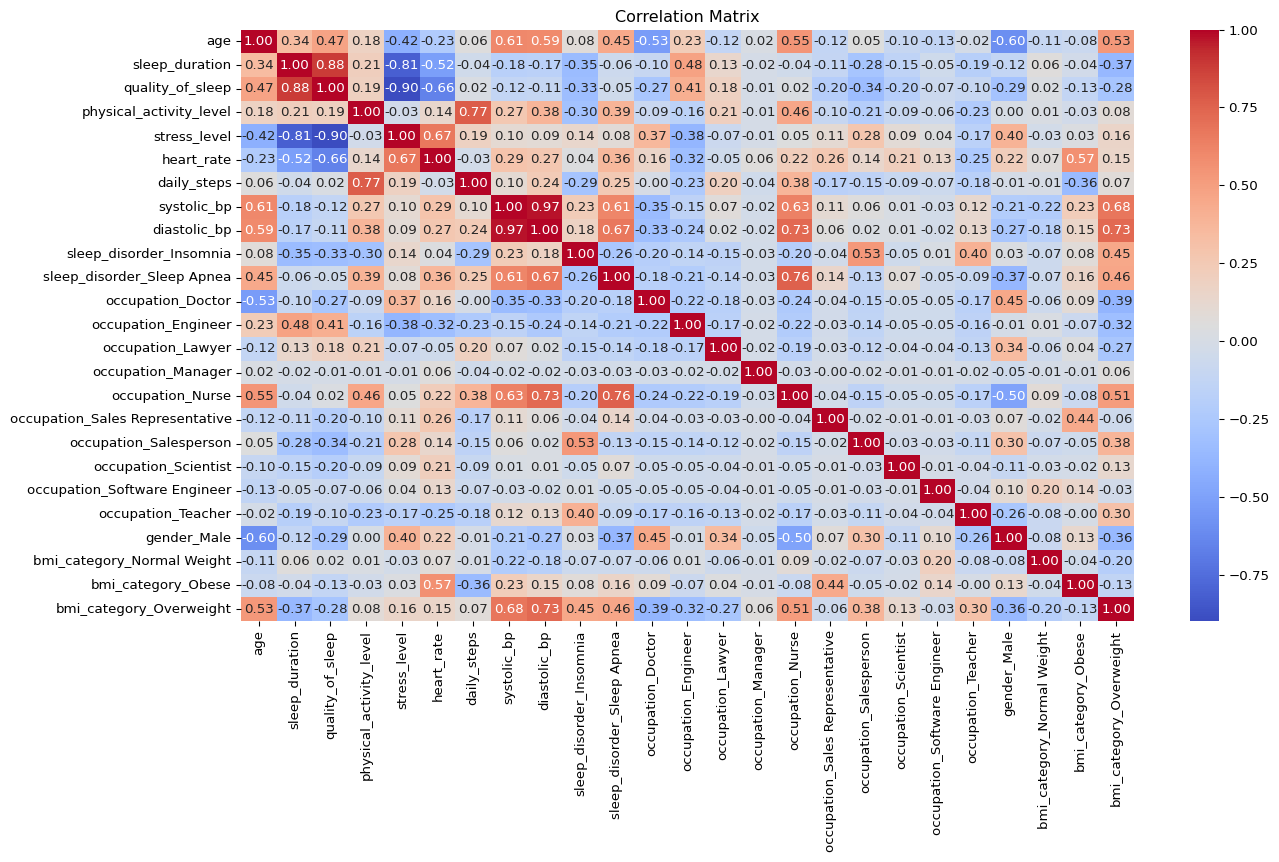

In [49]:
corr = df_processed.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8), dpi=96)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [39]:
X = df_processed.drop(columns=['stress_level'])
y = df_processed['stress_level']

In [40]:
X.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea,...,occupation_Nurse,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,gender_Male,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight
0,27,6.1,6,42,77,4200,126,83,False,False,...,False,False,False,False,True,False,True,False,False,True
1,28,6.2,6,60,75,10000,125,80,False,False,...,False,False,False,False,False,False,True,False,False,False
2,28,6.2,6,60,75,10000,125,80,False,False,...,False,False,False,False,False,False,True,False,False,False
3,28,5.9,4,30,85,3000,140,90,False,True,...,False,True,False,False,False,False,True,False,True,False
4,28,5.9,4,30,85,3000,140,90,False,True,...,False,True,False,False,False,False,True,False,True,False


In [41]:
y.head()

0    6
1    8
2    8
3    8
4    8
Name: stress_level, dtype: int64

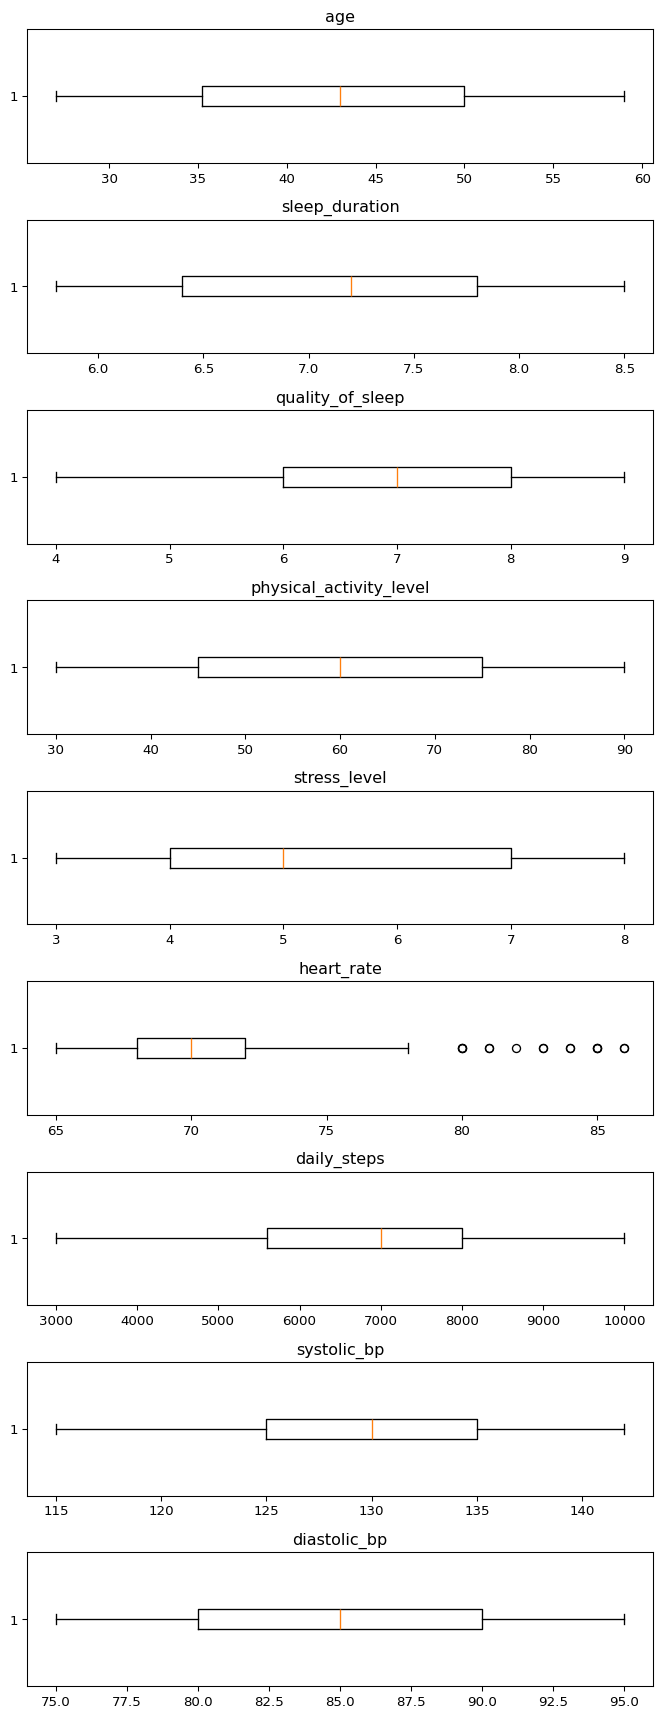

In [44]:
import matplotlib.pyplot as plt

numerical_cols = [col for col in df_processed.columns if df_processed[col].dtype in ['int64', 'float64']]

fig, ax = plt.subplots(len(numerical_cols), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(numerical_cols):
    ax[i].boxplot(df_processed[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

In [45]:
# Scale the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
X_normalized = X.copy()
X_normalized[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_normalized.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea,...,occupation_Nurse,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,gender_Male,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight
0,-1.753096,-1.298887,-1.098280,-0.825418,1.654719,-1.619584,-0.330002,-0.268102,False,False,...,False,False,False,False,True,False,True,False,False,True
1,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,False,True,...,False,True,False,False,False,False,True,False,True,False
4,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,False,True,...,False,True,False,False,False,False,True,False,True,False


In [46]:
# Create a classification model using Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  1 16]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.83      1.00      0.91        10
           5       1.00      0.86      0.92        14
           6       0.89      0.80      0.84        10
           7       0.86      1.00      0.92        12
           8       1.00      0.94      0.97        17

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [47]:
# create a categorical classification model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      0.86      0.92        14
           6       0.83      1.00      0.91        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

